##**CNN Assignment: Image Classification**

###**Fashion-MNIST Dataset from Kaggle**

###**Part 1: Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Install and import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

In [ ]:
#load data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
#show number of images and classes
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
#show number of classes and class names
print(np.unique(train_labels))
print(np.unique(test_labels))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


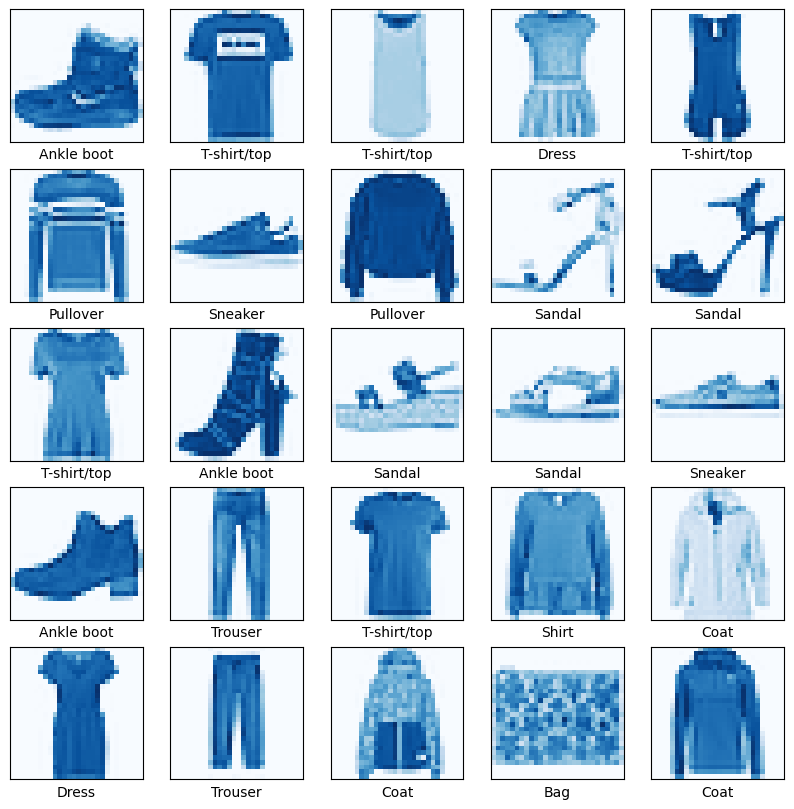

In [ ]:
#Display sample images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print (class_names)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='Blues')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Number of images in each class
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(labels_array):
    label_counts = np.bincount(labels_array)
    total_samples = len(labels_array)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[i]
        count = label_counts[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_labels)

T-shirt/top         :   6000 or 10.0%
Trouser             :   6000 or 10.0%
Pullover            :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Shirt               :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%


In [ ]:
print("Fashion MNIST train -  rows:",train_images.shape[0]," columns:", train_images.shape[1])
print("Fashion MNIST test -  rows:",test_images.shape[0]," columns:", test_images.shape[1])

Fashion MNIST train -  rows: 60000  columns: 28
Fashion MNIST test -  rows: 10000  columns: 28


In [ ]:
#Split into train/validation
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
#Normalise pixel values(0-1 range)
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0
print(train_images.shape)
print(val_images.shape)
print(test_images.shape)

(48000, 28, 28)
(12000, 28, 28)
(10000, 28, 28)


###**Part 2: Model**

In [ ]:
#Build a CNN with 2 Conv2D layers
def create_cnn_model():
    model = keras.Sequential([
    #1st block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    #2nd block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #3rd block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

    return model

In [ ]:
#Create and compile the model
model = create_cnn_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Build a CNN with 3 maxpooling layers
model = keras.Sequential([
    #1st block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    #2nd block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #3rd block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,578 (396.79 KB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

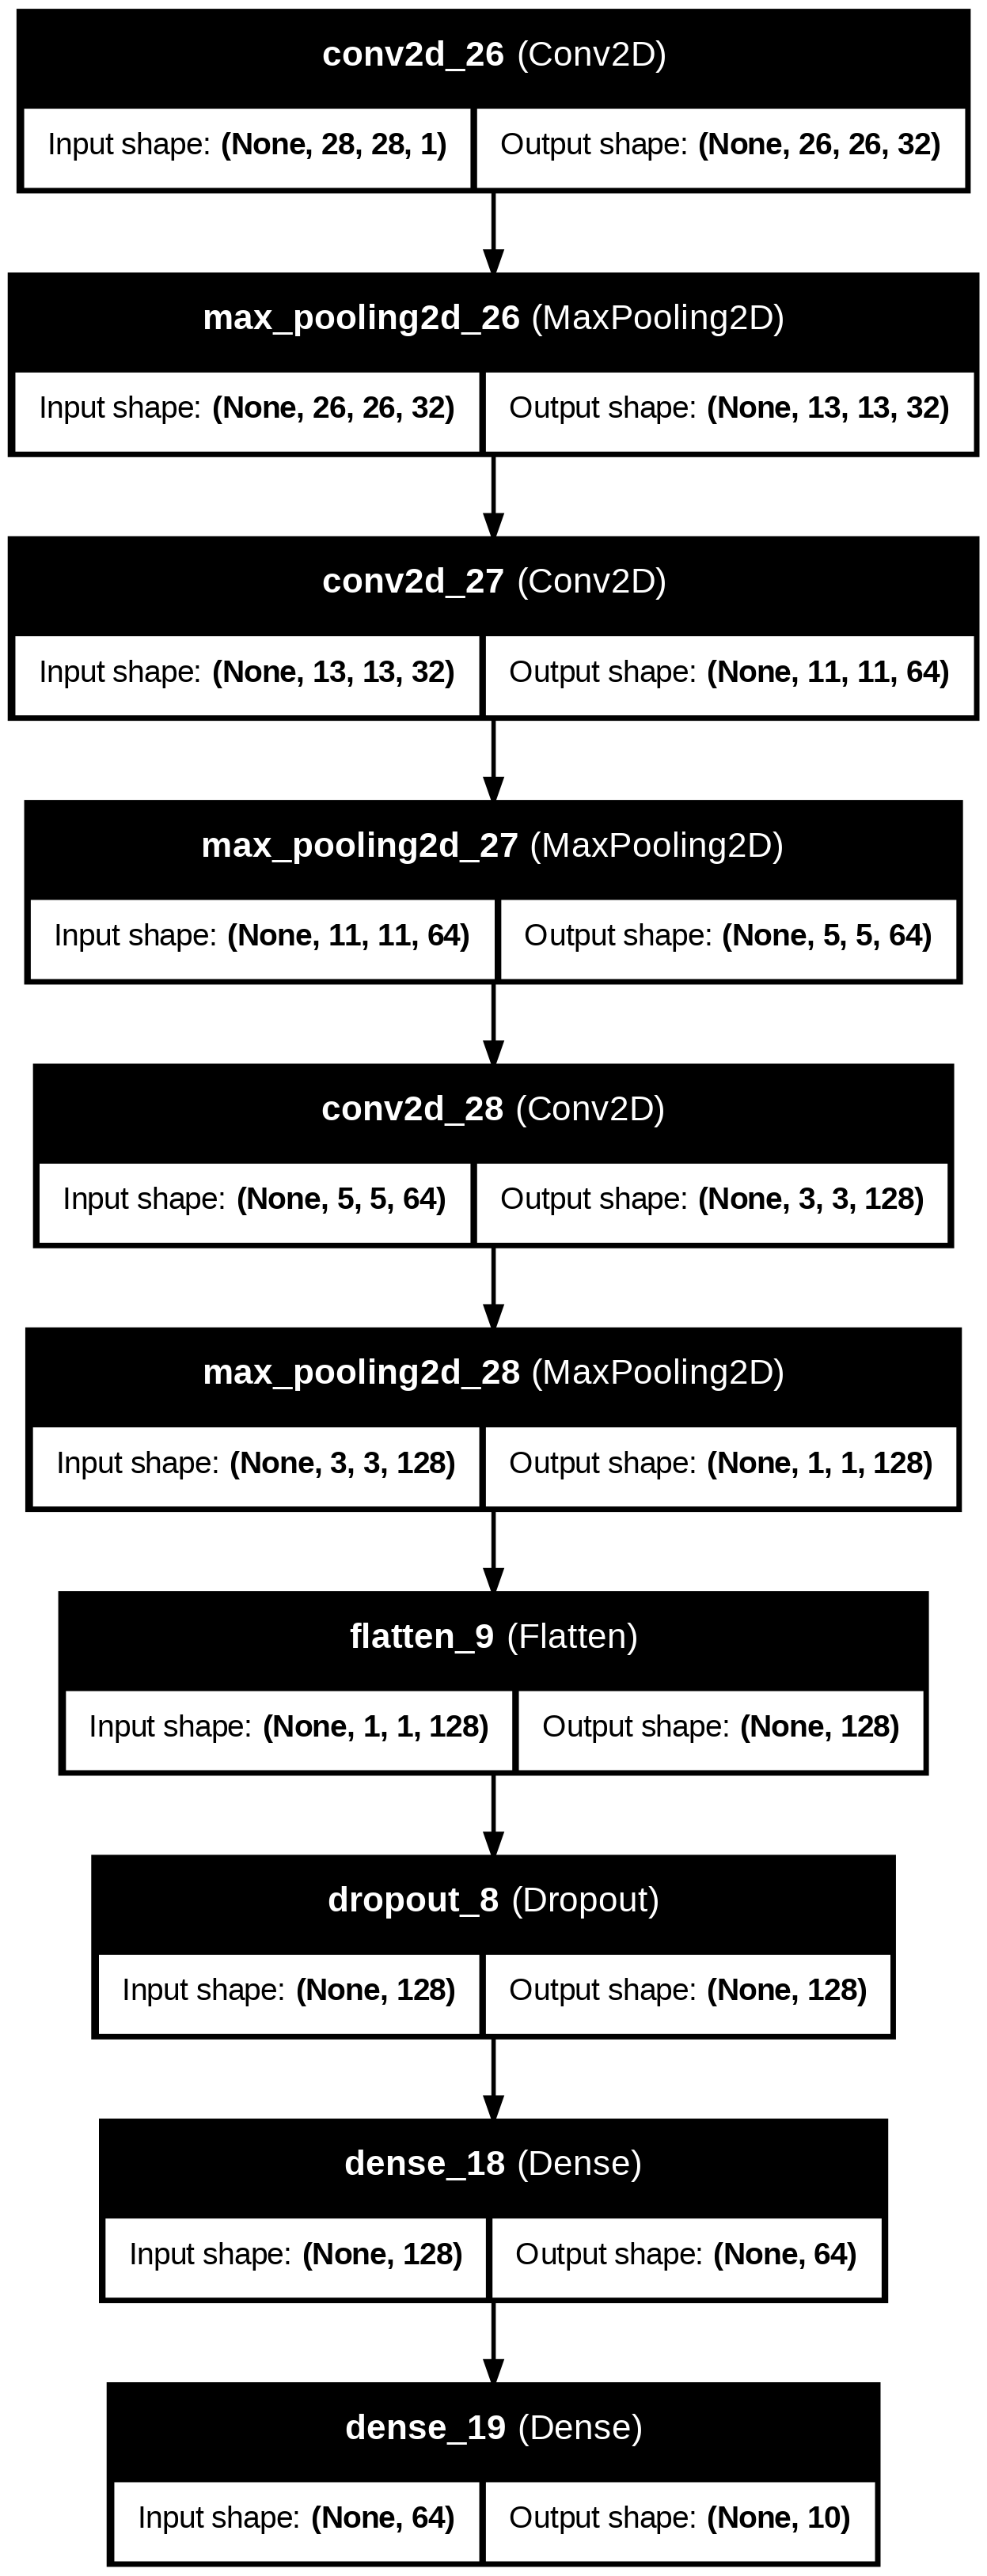

In [ ]:
#Plot the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


###**Part 3: Training CNN model**

In [ ]:
#Compile model (loss, optimer, metrics)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#Use earlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
#Reduce Learning Rate On Plateau
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

In [ ]:
#Train for reasonable epochs
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6345 - loss: 0.9763 - val_accuracy: 0.8158 - val_loss: 0.4991
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 38ms/step - accuracy: 0.8064 - loss: 0.5375 - val_accuracy: 0.8487 - val_loss: 0.4086
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.8374 - loss: 0.4447 - val_accuracy: 0.8622 - val_loss: 0.3764
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.8536 - loss: 0.4059 - val_accuracy: 0.8669 - val_loss: 0.3610
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.8660 - loss: 0.3686 - val_accuracy: 0.8659 - val_loss: 0.3559
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 39ms/step - accuracy: 0.8715 - loss: 0.3469 - val_accuracy: 0.8796 - val_loss: 0.3238
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 40ms/step - accuracy: 0.8768 - loss: 0.3370 - val_accuracy: 0.8832 - val_loss: 0.3117
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.8812 -

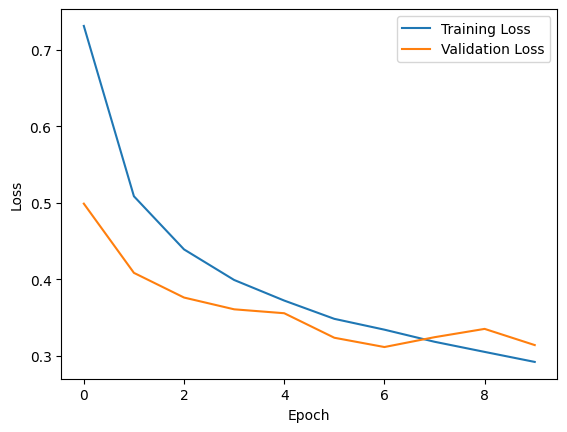

In [ ]:
#plot training curves (loss)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


###**Observations**

1. Both the "Training Loss" and "Validation Loss" lines are generally decreasing as the number of epochs increases. This indicates that your model is learning and reducing its errors over time.

2. The loss plot indicates that the model is learning, and data augmentation is helping to mitigate overfitting.



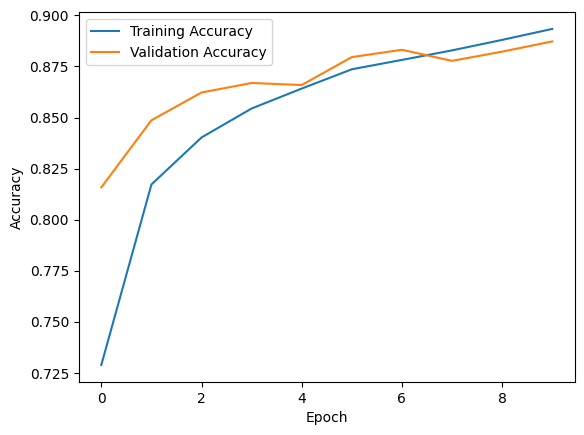

In [ ]:
#plot training accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###**Observations**

1. The validation accuracy is consistently higher than the training accuracy and slightly reduces towards the end, and while both increase, there is a visible gap. This suggests some degree of overfitting.

2. The plot show good learning progress, and data augmentation appears to be beneficial in improving generalization.

###**Part 4: Evaluation**

In [ ]:
#Test accuracy on validation set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8809 - loss: 0.3430
Test accuracy: 0.879800021648407
Test loss: 0.33961021900177


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


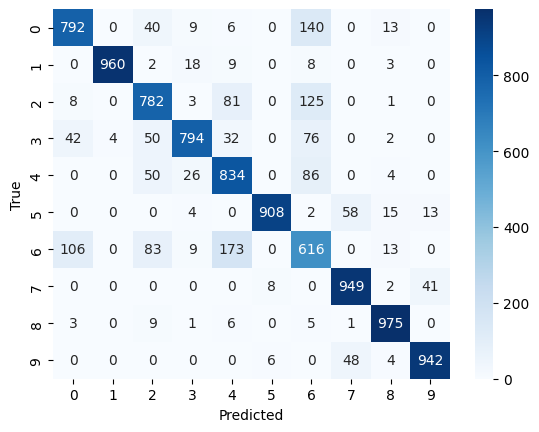

In [113]:
#Show confusion matrix
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
#classification report
print(classification_report(test_labels, y_pred, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.84      0.83      1000
       Dress       0.87      0.91      0.89      1000
        Coat       0.77      0.89      0.82      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.76      0.54      0.63      1000
     Sneaker       0.85      0.99      0.92      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.98      0.87      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



###**Observations**

1. Precision: This is the ability of the classifier not to label as positive a sample that is negative. For each class, it's the ratio of true positives to the sum of true positives and false positives. A high precision means that when the model predicts a class, it is very likely to be correct.

2. Recall: This is the ability of the classifier to find all the positive samples. For each class, it's the ratio of true positives to the sum of true positives and false negatives. A high recall means that the model is good at identifying all instances of a particular class.

3. F1-score: This is the harmonic mean of precision and recall. It's a single metric that balances both precision and recall. A high F1-score indicates good performance on both metrics.

4. Support: This is the number of actual occurrences of the class in the test set.


5. The accuracy at the bottom (0.88) is the overall accuracy of the model on the test set, which is the total number of correct predictions divided by the total number of test images.

6. The model performs very well on some classes like 'Trouser', 'Sandal', 'Sneaker', and 'Bag', with high precision, recall, and F1-scores (0.95 and above).

7. The model seems to have more difficulty with classes like 'Shirt' (precision 0.76, recall 0.54, F1-score 0.63) and 'Coat' (precision 0.77, recall 0.89, F1-score 0.82). This suggests that these classes might be more challenging to distinguish, possibly due to visual similarities with other classes (e.g., shirts and t-shirts, coats and pullovers).

8. The model is generally performing well, especially on certain classes. However, there are areas for improvement, particularly in distinguishing between classes like 'Shirt' and 'Coat'.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


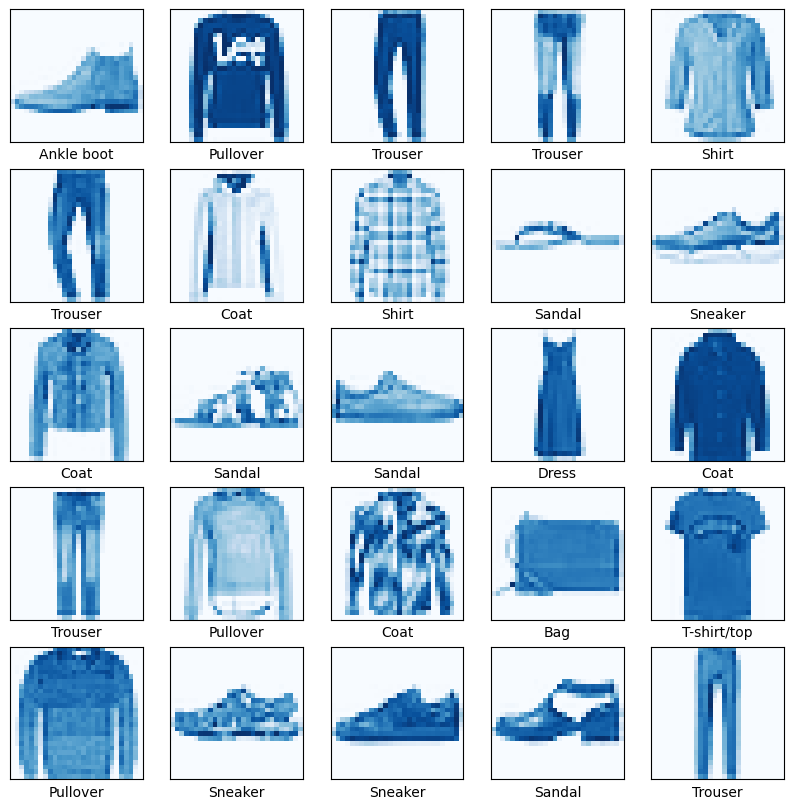

In [ ]:
# Display sample predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap='Blues')
    plt.xlabel(class_names[predicted_labels[i]])
plt.show()

###**Observations**
 The model predicted most of the class names correctly with just a slight confusion between sneakers and sandals


###**Part 5: Improvement**

In [ ]:
#use different architecture
model = keras.Sequential([
    #1st block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    #2nd block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    #3rd block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,474 (400.29 KB)

 Trainable params: 102,026 (398.54 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
#use new hyperparameters
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.7323 - loss: 0.7537 - val_accuracy: 0.8555 - val_loss: 0.3940
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 64s 43ms/step - accuracy: 0.8475 - loss: 0.4195 - val_accuracy: 0.8713 - val_loss: 0.3469
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 64s 43ms/step - accuracy: 0.8662 - loss: 0.3691 - val_accuracy: 0.8901 - val_loss: 0.3043
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - accuracy: 0.8794 - loss: 0.3312 - val_accuracy: 0.8881 - val_loss: 0.3009
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 43ms/step - accuracy: 0.8854 - loss: 0.3109 - val_accuracy: 0.8895 - val_loss: 0.2965
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 42ms/step - accuracy: 0.8913 - loss: 0.2922 - val_accuracy: 0.8956 - val_loss: 0.2834
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 43ms/step - accuracy: 0.8981 - loss: 0.2770 - val_accuracy: 0.8957 - val_loss: 0.2880
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.9047 -

###**Observations**

Both training and validation loss are decreasing, which is a good sign that the model is learning. The validation loss is higher than the training loss, which is normal and indicates that the model performs slightly better on the data it was trained on than on unseen data.

Both training and validation accuracy are increasing. The validation accuracy is slightly lower than the training accuracy, which is also normal.
Overall Performance: The model is improving over the epochs, and the validation accuracy is reaching a good level of 0.89. This suggests that the model is learning to classify the Fashion-MNIST images.


In [ ]:
#use dropout/regularization model improvement
from tensorflow.keras.layers import Dropout
model = keras.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,474 (400.29 KB)

 Trainable params: 102,026 (398.54 KB)

 Non-trainable params: 448 (1.75 KB)

In [108]:
#use data augmentation to improve model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reshape images to include channel dimension
train_images_reshaped = train_images.reshape(-1, 28, 28, 1)
val_images_reshaped = val_images.reshape(-1, 28, 28, 1)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Compile the model before training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(datagen.flow(train_images_reshaped, train_labels, batch_size=32),
          epochs=10, validation_data=(val_images_reshaped, val_labels))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.6165 - loss: 1.0626 - val_accuracy: 0.7937 - val_loss: 0.5498
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 53ms/step - accuracy: 0.7491 - loss: 0.6763 - val_accuracy: 0.7974 - val_loss: 0.5425
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - accuracy: 0.7754 - loss: 0.6035 - val_accuracy: 0.8248 - val_loss: 0.4726
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - accuracy: 0.7967 - loss: 0.5558 - val_accuracy: 0.8280 - val_loss: 0.4521
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - accuracy: 0.8031 - loss: 0.5357 - val_accuracy: 0.8174 - val_loss: 0.4733
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 53ms/step - accuracy: 0.8054 - loss: 0.5315 - val_accuracy: 0.8322 - val_loss: 0.4454
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - accuracy: 0.8116 - loss: 0.5141 - val_accuracy: 0.8493 - val_loss: 0.4129
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - accuracy: 0.8199 - loss: 0.49

In [114]:
#save the model
model.save('my_model.keras')
print("Model saved to disk")


Model saved to disk


###**Results summary**
In the first epoch, the model has a relatively low training accuracy (0.6165) and high training loss (1.0626). The validation accuracy is also lower (0.7937) compared to the previous training run without data augmentation, and the validation loss is higher (0.5498). This is expected as the model is starting to learn from the augmented data.

As training progresses, both the training and validation accuracy generally increase, and the training and validation loss generally decrease. This indicates that the model is learning and improving over time.

The training accuracy with data augmentation (around 0.82-0.83) is significantly lower than the training accuracy without augmentation (around 0.89-0.90), which suggests that data augmentation is helping to regularize the model and prevent overfitting to the training data.

The model's performance is still improving after 10 epochs, as indicated by the increasing validation accuracy and decreasing validation loss towards the end of the training. Training for more epochs or with a different set of data augmentation parameters could potentially lead to further improvements.

Data augmentation thas helped to regularize the model and improve its generalization ability, although it might require more epochs to reach a similar validation accuracy as training without augmentation.   



              ******END OF ASSIGNMENT******